In [1]:
###########################################
########## Author: Drew Afromsky ##########
####### Email: daa2162@columbia.edu #######
############ Date: 02/05/2020 #############

#########################################################
# This Notebook is dedicated to visualizingthe ICH data #
#########################################################

While all acute (i.e. new) hemorrhages appear dense (i.e. white) on computed tomography 
(CT), the primary imaging features that help Radiologists determine the subtype of 
hemorrhage are the **location, shape and proximity** to other structures.

**Intraparenchymal hemorrhage** is blood that is located completely within the brain itself; 

**Intraventricular or Subarachnoid hemorrhage** is blood that has leaked into the spaces of the brain that normally contain cerebrospinal fluid (the ventricles or subarachnoid cisterns). 

**Extra-axial hemorrhages** are blood that collects in the tissue coverings that surround the brain (e.g. subdural or epidural subtypes). ee figure.) 

**Patients may exhibit more than one type of cerebral hemorrhage, which c may appear on the same image.

# Visualize Train Images

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [3]:
# Print the current working directory
os.getcwd()

'/Users/DrewAfromsky/Desktop/Projects/Behold-ai/Models'

In [4]:
# Directory with the unzipped training image files in .png format
train_imgs_dir = "/Users/DrewAfromsky/Desktop/Projects/Behold-ai/wetransfer-600486/train_images"
images = train_imgs_dir

In [5]:
from image_generator import ImageGenerator
gen = ImageGenerator()

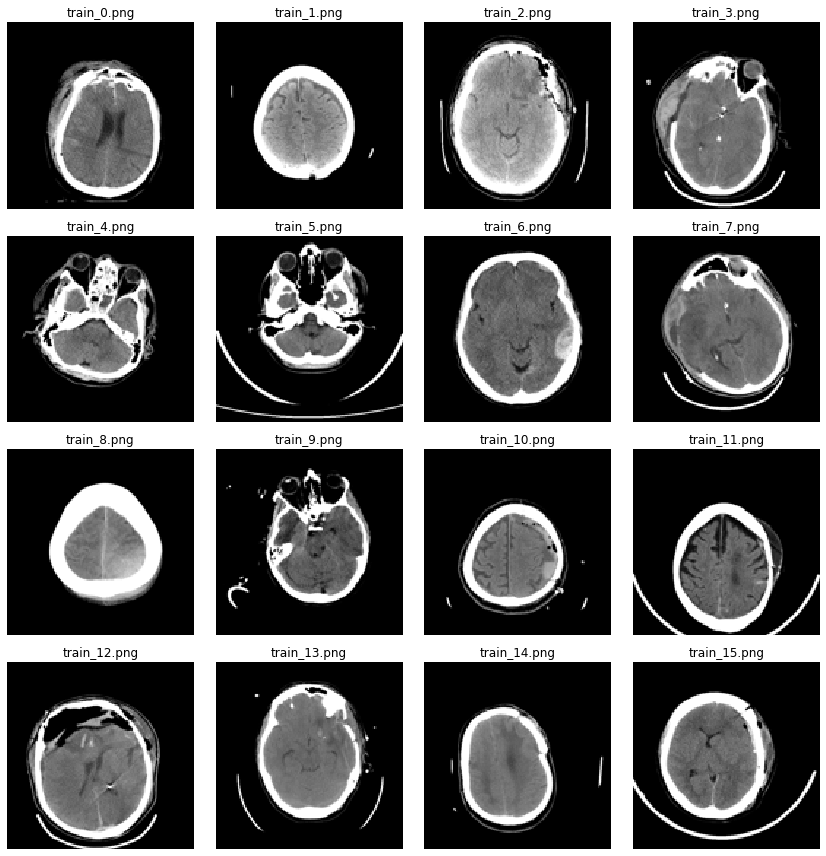

In [6]:
gen.show(images)

In [7]:
# Print the current working directory
os.getcwd()

'/Users/DrewAfromsky/Desktop/Projects/Behold-ai'

# Visualize the Train Labels from csv

In [8]:
# View the csv file containing the labels for the training images
# This is a multi-label classification problem
train_labels = pd.read_csv("/Users/DrewAfromsky/Desktop/Projects/Behold-ai/wetransfer-600486/behold_coding_challenge_train.csv")
train_labels.head()

,Unnamed: 0,ID,epidural,intraparenchymal,subarachnoid
0,0,train_0,1,0,1
1,1,train_1,1,0,0
2,2,train_2,1,0,1
3,3,train_3,1,0,1
4,4,train_4,1,0,0


In [9]:
train_labels = train_labels.drop(['Unnamed: 0'],axis=1)

In [10]:
train_labels

,ID,epidural,intraparenchymal,subarachnoid
0,train_0,1,0,1
1,train_1,1,0,0
2,train_2,1,0,1
3,train_3,1,0,1
4,train_4,1,0,0
...,...,...,...,...
8537,train_8588,0,0,0
8538,train_8589,0,0,0
8539,train_8590,0,0,0
8540,train_8591,0,0,0


In [11]:
train_labels['multilabel'] = train_labels['epidural'] + train_labels['intraparenchymal'] + train_labels['subarachnoid'] 

In [12]:
print(f"Number of training images {len(train_labels['ID'])}")

Number of training images 8542


In [13]:
# Get the combined labels to find which images are multilabeled
z = zip(train_labels['epidural'],train_labels['intraparenchymal'],train_labels['subarachnoid'])
z = list(z)

In [14]:
categories = list(train_labels.columns.values)
categories.pop(0)
categories

['epidural', 'intraparenchymal', 'subarachnoid', 'multilabel']

In [15]:
# Number of train images with epidural sub-class
E = train_labels['epidural'].sum()

In [16]:
# Number of train images with intraparenchymal sub-class
I = train_labels['intraparenchymal'].sum()

In [17]:
# Number of train images with subarachnoid sub-class
S = train_labels['subarachnoid'].sum()

In [18]:
df = pd.DataFrame({'label':['epidural', 'intraparenchymal', 'subarachnoid'], 'value':[E, I, S]})

In [19]:
# Number of images with more than one label
counter = 0
for i in range(len(train_labels['multilabel'])):
    if train_labels['multilabel'][i] >= 2:
        counter+=1
print(counter)

1372


In [20]:
df = df.append({'label' : 'multilabeled', 'value': counter} , ignore_index=True)
df

,label,value
0,epidural,341
1,intraparenchymal,3192
2,subarachnoid,2958
3,multilabeled,1372


Text(0.5, 1.0, 'Number of Images with at Least One Instance of Sub-Class')

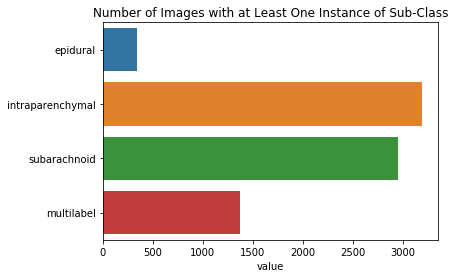

In [21]:
# Number of images with at least one of the sub-classes
ax = sns.barplot(y = categories, x = df['value'])
ax.set_title("Number of Images with at Least One Instance of Sub-Class")

# Visualize a few examples from each class

## epidural

### Get the first 5 examples of images with epidural ONLY as their class label

In [22]:
os.chdir(images)

In [23]:
def subtype_plot(label):
        
    """
    Plot the first 5 examples of each subtype
    :param label: the categorical label corresponding to the instance of each class
    """
    e = []

    fig = plt.figure(figsize=(12,12))
    fig.set_tight_layout(True)

    # Get the indices of the training images with epidural as their only class label
    for zee in range(len(z)):
        if z[zee] == label:
            e.append(zee)

    for r in range(5):
        l = images + '/' + train_labels['ID'][e[r]] + '.png'
        img = cv2.imread(l)
        ax_img = fig.add_subplot(1,5, r+1)
        ax_img.imshow(img)
        ax_img.set_title(train_labels['ID'][e[r]] + '.png')
        ax_img.axis("off")

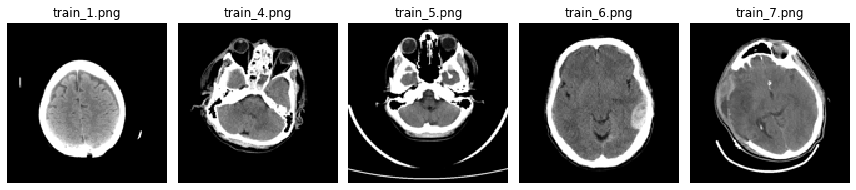

In [24]:
subtype_plot((1,0,0))

## intraparenchymal

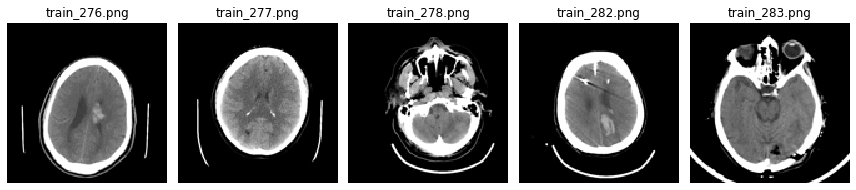

In [25]:
subtype_plot((0,1,0))

## subarachnoid

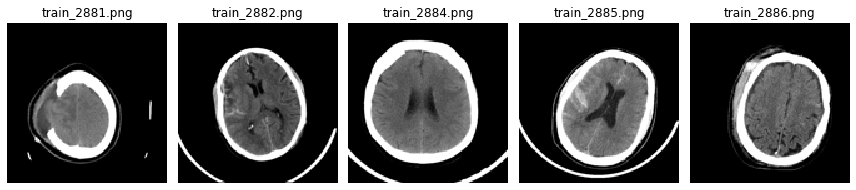

In [26]:
subtype_plot((0,0,1))